<a href="https://colab.research.google.com/github/Alton1998/University-Notes/blob/main/Denoising_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from cv2.ximgproc import anisotropicDiffusion

# Loading Image

In [56]:
image_file = plt.imread("/content/Image_HM4D_3.jpg")

In [57]:
image_file = np.array(image_file)

In [58]:
image_file

array([[154, 192, 175, ..., 206, 221, 212],
       [147, 166, 178, ..., 240, 233, 238],
       [174, 150, 161, ..., 231, 234, 203],
       ...,
       [198, 222, 199, ...,  82, 102, 156],
       [198, 210, 198, ...,  86, 135, 116],
       [219, 212, 208, ..., 103, 108, 111]], dtype=uint8)

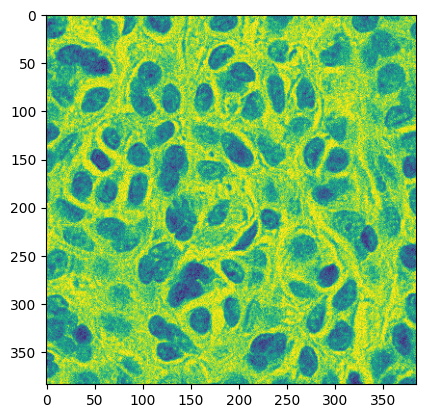

In [59]:
plt.imshow(image_file)

# Denoising

## Arithmetic Mean

In [60]:
AM3 = cv2.blur(image_file,(3,3))
AM5 = cv2.blur(image_file,(5,5))
AM7 = cv2.blur(image_file,(7,7))

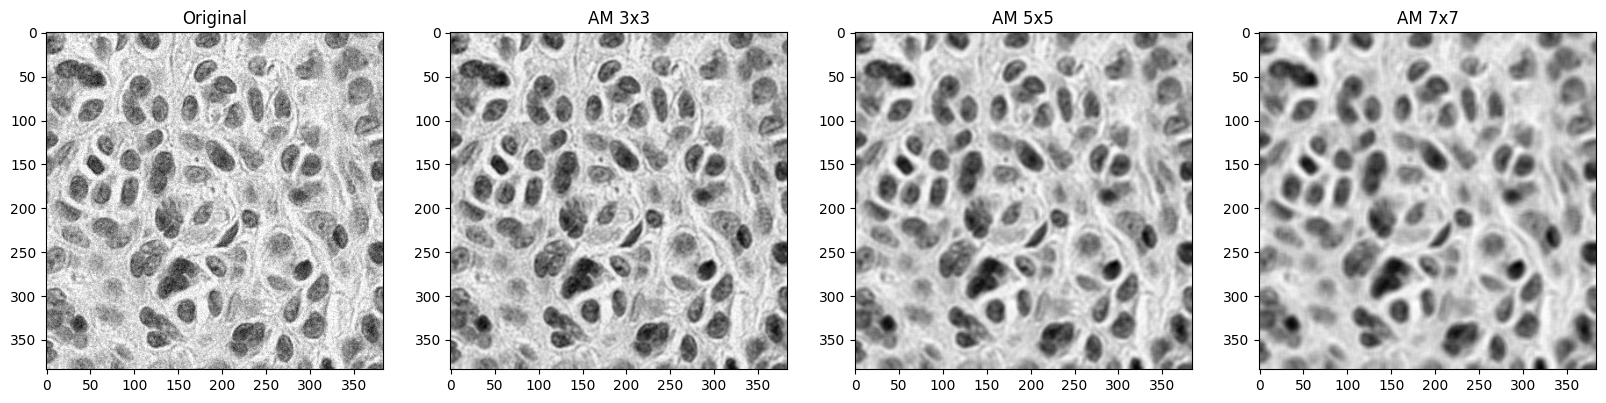

In [61]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(image_file,cmap='gray')
plt.subplot(1, 4, 2)
plt.title("AM 3x3")
plt.imshow(AM3,cmap='gray')
plt.subplot(1, 4, 3)
plt.title("AM 5x5")
plt.imshow(AM5,cmap='gray')
plt.subplot(1, 4, 4)
plt.title("AM 7x7")
plt.imshow(AM7,cmap='gray')
plt.show()

### Looks like  3x3 filter performs better than all the filters here

## Median Filter

In [62]:
median_filter_3 = cv2.medianBlur(image_file,3)
median_filter_5 = cv2.medianBlur(image_file,5)
median_filter_7 = cv2.medianBlur(image_file,7)

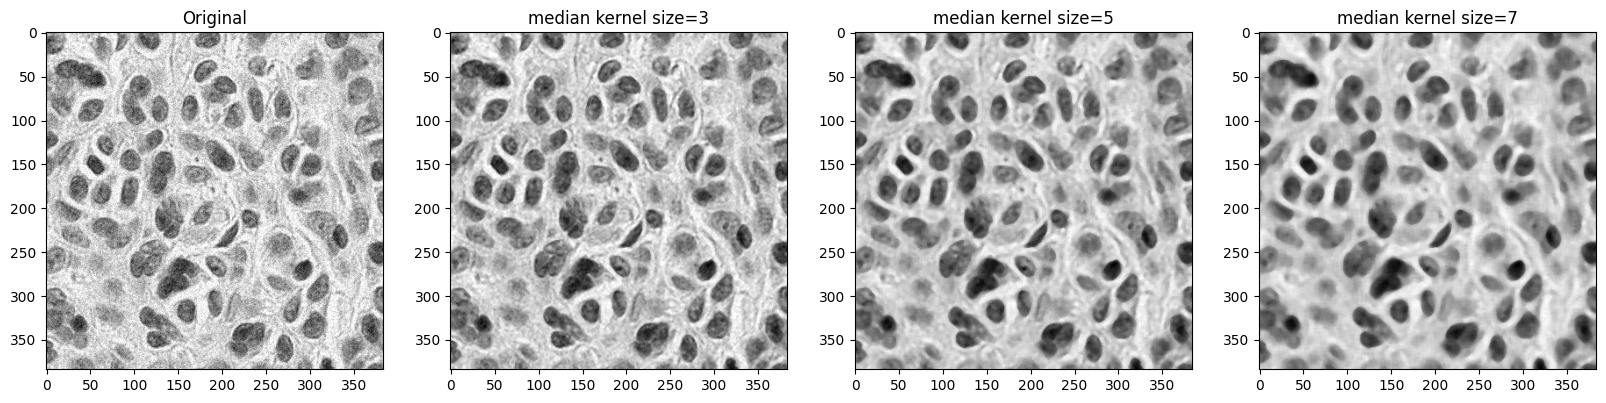

In [63]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(image_file,cmap='gray')
plt.subplot(1, 4, 2)
plt.title("median kernel size=3")
plt.imshow(median_filter_3,cmap='gray')
plt.subplot(1, 4, 3)
plt.title("median kernel size=5")
plt.imshow(median_filter_5,cmap='gray')
plt.subplot(1, 4, 4)
plt.title("median kernel size=7")
plt.imshow(median_filter_7,cmap='gray')
plt.show()

### Median filter of kernel size = 3 looks to be suitable here

## Anisotropic Diffusion Filter

### Parameters

- **Lambda(in python its treated as alpha
)**
- **kappa** - sensitivity to edges

In [73]:
image_file = cv2.imread("/content/Image_HM4D_3.jpg")
alphas = list()
kappas = list()
for i in range(1,5):
  alphas.append(i/10)
for i in range(10,100,25):
  kappas.append(i)
print(alphas)
print(kappas)


[0.1, 0.2, 0.3, 0.4]
[10, 35, 60, 85]


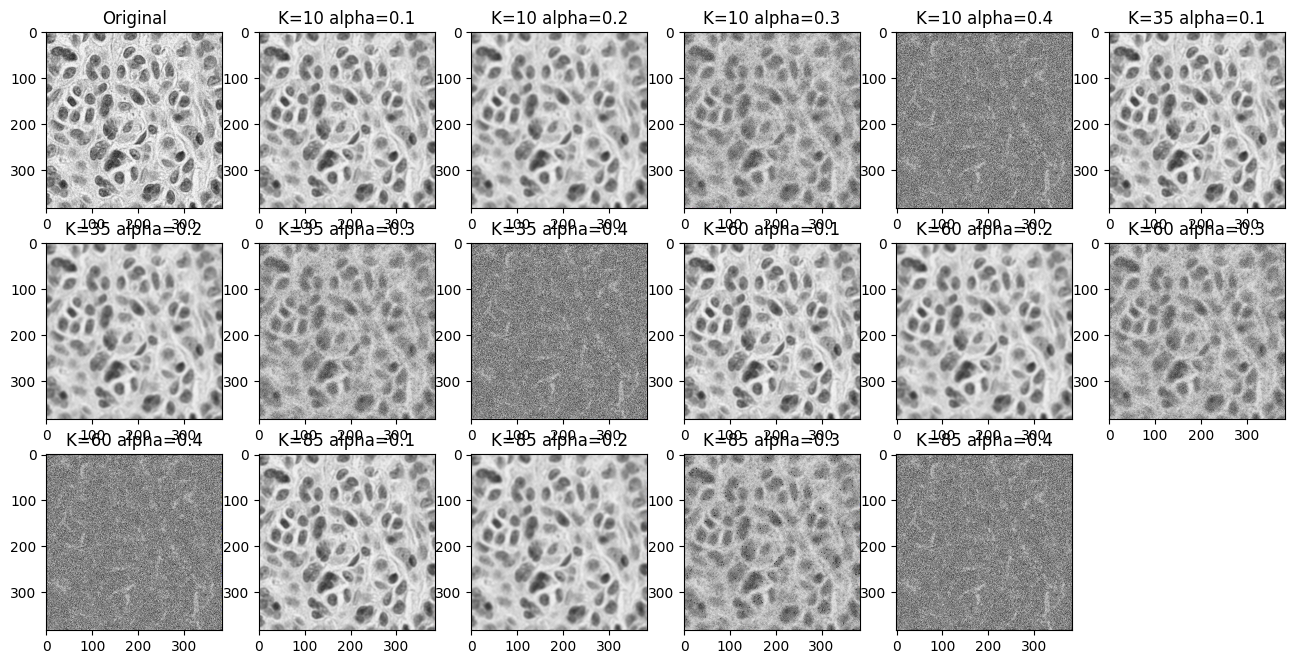

In [74]:
plt.figure(figsize=(16,16))
plt.subplot(len(kappas)+2, len(alphas)+2, 1)
plt.title("Original")
plt.imshow(image_file,cmap='gray')
a=1
for i in kappas:
  for j in alphas:
    a=a+1
    ad_filter = anisotropicDiffusion(image_file,alpha=j,K=i,niters=3)
    plt.subplot(len(kappas)+2, len(alphas)+2, a)
    plt.title(f'K={i} alpha={j}')
    plt.imshow(ad_filter,cmap='gray')